In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
COSMOS = pd.read_csv('match_COSMOS_99_with_err.csv')
COSMOS.columns.values

photo_bands_all = np.loadtxt('match_COSMOS_99_with_err.csv',
                        delimiter=',',
                        comments='#',
                        skiprows=1,
                        usecols=[2,7,9,11,13,15,17,19,21,23,25,27,29,31,37,39,41,44,46,48,50,53,58,60,62,64])

IA767_MAG_APER2 = np.loadtxt('match_COSMOS_99_with_err.csv',
                        delimiter=',',
                        comments='#',
                        skiprows=1,
                        usecols=[19])

J_MAG_APER2 = np.loadtxt('match_COSMOS_99_with_err.csv',
                        delimiter=',',
                        comments='#',
                        skiprows=1,
                        usecols=[33])

Z_MINCHI2 = np.loadtxt('match_COSMOS_99_with_err.csv',
                        delimiter=',',
                        comments='#',
                        skiprows=1,
                        usecols=[56])

z_spec_all = np.loadtxt('match_COSMOS_99_with_err.csv',
                    delimiter=',',
                    comments='#',
                    skiprows=1,
                    usecols=[65])

(0.0, 1.5)

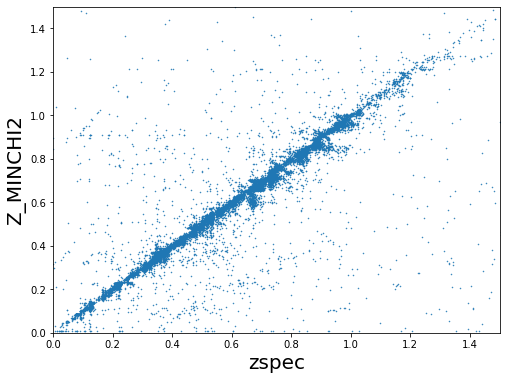

In [9]:
good_z = np.where(z_spec_all>0.)
z_spec = z_spec_all[good_z]
z_minchi = Z_MINCHI2[good_z]
plt.figure(figsize=(8,6))
plt.plot(z_spec, z_minchi,".",markersize=1)
plt.xlabel("zspec",fontsize=20)
plt.ylabel("Z_MINCHI2",fontsize=20)
plt.xlim(0.,1.5)
plt.ylim(0.,1.5)


In [34]:
good_z = np.where(z_spec_all>0.)
JMAG_lower = np.where(J_MAG_APER2>18.0)
JMAG_upper = np.where(J_MAG_APER2<22.5)

tmp = good_z[0]
tmp_JMAG_lower = JMAG_lower[0]
tmp_JMAG_upper = JMAG_upper[0]

rst = []
for i in range(len(tmp)):
    if tmp[i] in tmp_JMAG_upper:
        if tmp[i] in tmp_JMAG_lower:
            rst.append(tmp[i]) 
print(len(rst))

16755


(array([     0,      1,      2, ..., 391099, 391101, 391102], dtype=int64),)
(array([     2,      5,      6, ..., 391098, 391099, 391100], dtype=int64),)
[21.827747 19.124456 19.039341 ... 18.998526 19.700262 20.330938]


(15, 25)

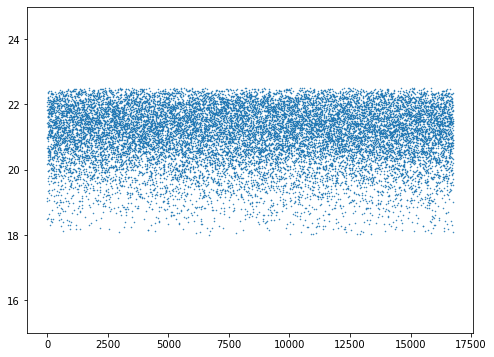

In [35]:
val = J_MAG_APER2[rst]
print(JMAG_upper)
print(JMAG_lower)
print(val)
plt.figure(figsize=(8,6))
plt.plot(val,".",markersize=1)
#plt.xlim(0.,2)
plt.ylim(15,25)

In [3]:
good_z = np.where(z_spec_all>0.)
IA767_lower = np.where(IA767_MAG_APER2>18.0)
IA767_upper = np.where(IA767_MAG_APER2<23)

tmp = good_z[0]
tmp_767_lower = IA767_lower[0]
tmp_767_upper = IA767_upper[0]

rst = []
for i in range(len(tmp)):
    if tmp[i] in tmp_767_upper:
        if tmp[i] in tmp_767_lower:
            rst.append(tmp[i]) 
print(len(rst))

1
16679


(array([     1,      2,      3, ..., 391100, 391101, 391102], dtype=int64),)
(array([     0,      5,      8, ..., 391084, 391085, 391086], dtype=int64),)
[18.323952 22.337355 20.028927 ... 19.88289  20.522844 21.194254]


(15, 25)

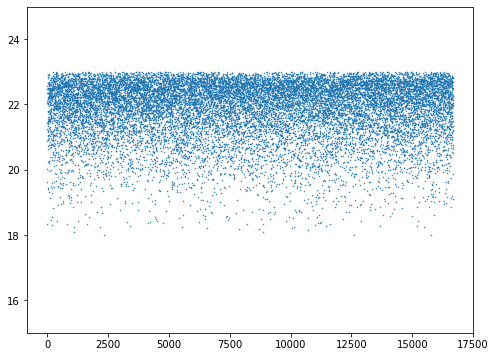

In [78]:
val = IA767_MAG_APER2[rst]
print(IA767_upper)
print(IA767_lower)
print(val)
plt.figure(figsize=(8,6))
plt.plot(val,".",markersize=1)
#plt.xlim(0.,2)
plt.ylim(15,25)

In [36]:
photo_bands = photo_bands_all[rst]
z_spec = z_spec_all[rst]

photo_bands_train,photo_bands_test, z_spec_train, z_spec_test = train_test_split(photo_bands, z_spec, test_size=0.25)

print ("training sample size: ",len(photo_bands_train))
print ("test sample size: ",len(photo_bands_test))
print ("train + test = ", len(photo_bands_train)+len(photo_bands_test))
print ("train / sample =", round(float(len(photo_bands_train))/float(len(photo_bands)),2))
print ("test / sample =", round(float(len(photo_bands_test))/float(len(photo_bands)),2))

training sample size:  12566
test sample size:  4189
train + test =  16755
train / sample = 0.75
test / sample = 0.25


In [37]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes = [100, 100], activation = 'relu', alpha = 100, solver = 'lbfgs').fit(photo_bands_train, z_spec_train)

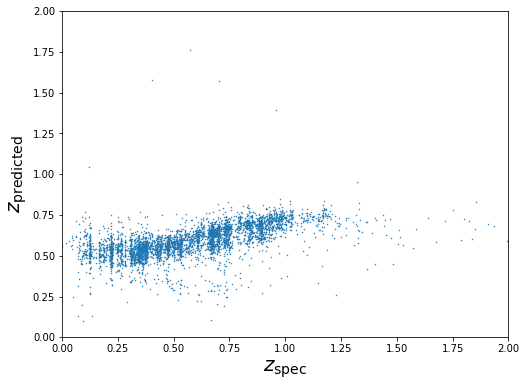

In [38]:
z_predict = mlpreg.predict(photo_bands_test)
#print(mlpreg.score(z_spec_test,z_predict))
plt.figure(figsize=(8,6))
plt.plot(z_spec_test,z_predict,".",markersize=1)
#plt.plot([0.,2.],[0.,2.])
plt.xlim(0.,2)
plt.ylim(0.,2)
plt.xlabel(r'$z_{\rm{spec}}$',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.show()

In [39]:
model = Sequential()
#create a network with 3 layers (we don't count the input one)
# in the input layer we choose a number of neurons (30) greater than the number of variables (26)
model.add(Dense(30,input_dim=26,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
# it's important to choose a linear activation function for the output layer
# as we are trying to predict real numbers and we are not classifying objects
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam')

print(z_spec_train)
model.fit(photo_bands_train,z_spec_train,epochs=40,batch_size=20)

z_predict = model.predict(photo_bands_test)

[0.3498 0.5058 0.4365 ... 0.7037 0.2547 0.1964]

Epoch 1/40
12566/12566 [==============================] - 2s 172us/step - loss: 0.3945
Epoch 2/40
12566/12566 [==============================] - 1s 101us/step - loss: 0.2664
Epoch 3/40
12566/12566 [==============================] - 1s 93us/step - loss: 0.2224
Epoch 4/40
12566/12566 [==============================] - 1s 92us/step - loss: 0.2203
Epoch 5/40
12566/12566 [==============================] - 1s 88us/step - loss: 0.2091
Epoch 6/40
12566/12566 [==============================] - 1s 95us/step - loss: 0.2017
Epoch 7/40
12566/12566 [==============================] - 1s 94us/step - loss: 0.1946
Epoch 8/40
12566/12566 [==============================] - 1s 89us/step - loss: 0.1764
Epoch 9/40
12566/12566 [==============================] - 1s 91us/step - loss: 0.1869
Epoch 10/40
12566/12566 [==============================] - 1s 92us/step - loss: 0.1687
Epoch 11/40
12566/12566 [==============================] - 1s 92us/step - loss: 0.1750
E

In [40]:
cvscores = []
scores = model.evaluate(photo_bands_test, z_spec_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names, scores*100))
cvscores.append(scores * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print(scores)

['loss']: 13.26%
13.26% (+/- 0.00%)
0.13258784841128027


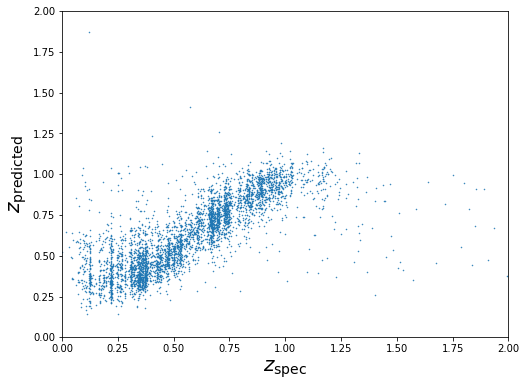

In [41]:
plt.figure(figsize=(8,6))
plt.plot(z_spec_test,z_predict,".",markersize=1)
#plt.plot([0.,2.],[0.,2.])
plt.xlim(0.,2)
plt.ylim(0.,2)
plt.xlabel(r'$z_{\rm{spec}}$',fontsize=20)
plt.ylabel(r'$z_{\rm{predicted}}$',fontsize=20)
plt.show()